In [1]:
#Notebook by P. Hess and C. Herdman
#Written: January 2021
#PHYS 0230 - Winter 2021

In [2]:
#Import the numpy and matplotlib packages
import numpy as np
import matplotlib.pyplot as plt

# Projectile Motion

## Free Fall in 1D

Lets start by considering free fall in 1 dimensional vertical free fall. We assume our projectile is being launced close to the surface of the Earth, where it experiences a uniform acceleration in the downward direction $\vec{a} = -g \hat{j}$. For now we'll neglect air resistance. Such a projectile in free-fall will have a position and velocity that follows the standard kinematic equations for motion under constant force/acceleration.
1. $$ y(t) = y_0 + v_{y0} t + \frac{1}{2} a t^2 $$
2. $$v(t) = v_{y0} + a t$$

First, lets just plot these exact solutions for the position and velocity using NumPy arrays anad Matplotlib. Lets assume we are starting at the origin $y_0 = 0$ and are dropped from rest $v_{y0} = 0$. 

Need to review basic kinematics and constant accleration? Check out these resources
1. [OpenStax University Physics Textbook](https://openstax.org/books/university-physics-volume-1/pages/3-4-motion-with-constant-acceleration)
2. [Crash Course Physics: Episodes 1-5](https://www.youtube.com/playlist?list=PL8dPuuaLjXtN0ge7yDk_UA0ldZJdhwkoV)

In [3]:
#In this cell we define a funciton which will caculate the analytic
#expression for y(t) (equation 1)
def KinematicEq1(y0, v0, a, t):
  '''
  Returns the displacement of an object subject to constant acceleration
  
  Parameters:
  y0 - initial position (m) - float or int
  v0 - initial velocity (m/s) - float or int
  a - constant acceleration (m/s**2) - float or int
  t - time (s) - float, int, or NumPy array
  '''
  #if t is an array, then y is an array with the same number of points
  y = y_0 + v_y0*t + 0.5*a*t**2 
  return y

In [4]:
#In this cell we define a funciton which will caculate the analytic
#expression for v(t) (equation 2)
def KinematicEq2(v0, a, t):
  '''
  Returns the displacement of an object subject to constant acceleration
  
  Parameters:
  v0 - initial velocity (m/s) - float or int
  a - constant acceleration (m/s**2) - float or int
  t - time (s) - float, int, or NumPy array
  '''

  v = v_y0 + a*t      
  return v      

In [5]:
#Now generate the data to plot from the analytic solution

#Input parameters for model
g = 9.8     #acceleration due to gravity (m/s^2)
y_0 = 0      #initial position (m)
v_y0 = 0     #initial vertical velocity (m)
t_fin = 10    #Final time (s)

#Define the time points to plot.
t = np.linspace(0, t_fin) #t is an array of 50 points (by default) from 0 to 10 seconds

#Use the analytic solutions to find the position and velocity as a function of time
y = KinematicEq1(y_0, v_y0, -g, t)
v = KinematicEq2(v_y0, -g, t)

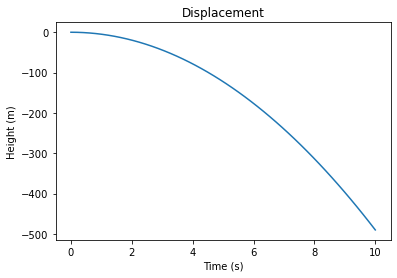

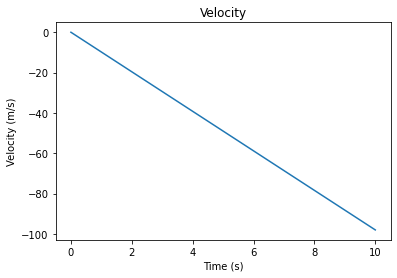

In [6]:
#Now plot the position and velocity as functions of time. 
#The way I'm doing it here plots the two in separate figures
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(t, y)                #Plot position versus t
axy.set_xlabel('Time (s)')    #Label the x-axis
axy.set_ylabel('Height (m)')  #Label the y-axis
axy.set_title("Displacement") #Title the plot

#Repeat this for the velocity plot
figv, axv = plt.subplots()    
axv.plot(t, v)
axv.set_xlabel('Time (s)')
axv.set_ylabel('Velocity (m/s)')
axv.set_title('Velocity')
plt.show()

### (Required) Exercise 1: 
**Getting Started and Modifying Code**

In the first cell of your answer notebook, copy and modify the code above to make the simulation plot the position versus time and velocity versus time curves for an object thrown vertically upward (as opposed to dropped) at 80 m/s. The time axis should extend at least as long as it takes for the ball to return to its starting height.

## The computational approach (Euler's Method)

Now lets take a uniquely computational approach to study free fall. The problem we need to solve is: given differential equation that describes and object's motion, along with the starting condition $v_0$ and $y_0$ at time $t_0=0$ how can we find $v_y$ and $y$ at all subsequent times? The basic approach involves dividing time into small steps $\Delta t$, and approximating the values of velocity and position at the next time step $v_y(t_0 + \Delta t)$ and $y(t_0 + \Delta t)$. Once we know the values of $v_y$ and $y$ at the next time step, we repeat whatever procedure to approximate their values at $t = t_0 + 2 \Delta t$ and so on. 

The motion of all classical objects is goverened by Newton's second law ($\vec{F} = m\vec{a}$). If we can model the force on an object, this allows us to write a differential equation for velocity since $d\vec{v}/dt = \vec{a} = \vec{F}/m$. If we know velocity, then we also have a differential equation to solve for the postition ($\vec{r}$) since $d\vec{r}/dt = \vec{v}$. 

For now, we'll consider the case of 1D motion
$$\frac{dv}{dt} = \frac{F}{m},~~~ \frac{dy}{dt} = v.$$ 

Note, a first-order ordinary differential equation is one that can be written in the form $dy/dt = f(y,t)$

Assuming we are on the surface of the earth such that $\vec{F}_g = -mg \hat{j}$, the differential equations from Newton's 2nd Law for 1-dimensional motion simplify to
$$\frac{dv}{dt} = -g,~~~ \frac{dy}{dt} = v$$

Euler's method is the simplest way of solving this numerical evolution of the differential equation. It is simple to understand and gives reasonable comutational solutions to the motion of objects when used properly. Mathematically, it comes from the first order Taylor series expansion of these equations of motion, which for the velocity says
$$v(t + \Delta t) = v(t) + \frac{dv}{dt} \Delta t + O[(\Delta t)^2]$$

Here $O[(\Delta t)^2] = \frac{1}{2}(\Delta t)^2 \frac{d^2y}{dt^2}$ is the next order term in the Taylor expansion that we can throw out if we make $\Delta t$ small enough. Throwing away that term, and plugging in Newton's Second Law $\frac{dv}{dt} = \frac{F}{m}$, we arrive at the Euler's Method to approximate for the velocity.
$$v(t + \Delta t) \approx v(t) + \frac{F(v,t)}{m} \Delta t$$

Don't worry if you aren't too comfortable with the Taylor series. We'll step through how to apply this result in your code below. 

In the case of free fall, we know the force is constant, so we can implement Euler's method by updating the velocity in the following way (which looks strikingly similar to the exact solution).
$$v(t + \Delta t) = v(t) - g \Delta t$$

But what about the position? Well, given the differential equation for position ($\frac{dy}{dt} = v$), once we know the velocity at time $t$ we can solve for the position as well.
$$y(t + \Delta t) = y(t) + v(t) \Delta t$$

The implementation is below.
Want to learn more about Euler's Method?
1. [Kahn Academy](https://www.khanacademy.org/math/ap-calculus-bc/bc-differential-equations-new/bc-7-5/v/eulers-method) A basic and perhaps more intuitive introduction that the one given above. You can see why it is good to have a computer help us use this approximation method.
2. [Wikipedia](https://en.wikipedia.org/wiki/Euler_method#:~:text=In%20mathematics%20and%20computational%20science,with%20a%20given%20initial%20value.) The article is actually quite good. Folks my be espeically interested in the derivation section. 

**Python Note:** In the code below, I am using the [tuple datatype](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) to return information from the function. A tuple is a sequence, like a list, but it is mostly used for grouping small amounts of information in a particular order. We'll often use them to easily group several values together for a single return call from a function. They are useful in that case mostly because one can use what is referred to [tuple assignment or unpacking](https://openbookproject.net/thinkcs/python/english3e/tuples.html), as is demonstrated below.

In [9]:
#Lets define a function to encapsulate this algorithm
#It will return the data describing the time, position, and velocity of the 1D trajectory
#We can then manipulate or plot that data as we see fit
def EulerFreeFall1D(y0, vy0, a, t_fin, dt):
    '''
    Performs the Euler Method to solve of the 1D trajectory of an object in free fall near the surface of the earth
    
    Parameters:
    y0 - Initial height (m)
    v0 - Initial velocity (m/s)
    t_fin - Final time of simulation (s)
    dt - Time Step Size (s)
    
    Returns:
    A tuple of NumPy arrays
    (time, vy, y)
    '''
    
    # The Euler algorithm requires us to discretize time, and evolve the position and velocity
    # of the object in discree time steps
    t_steps = int(t_fin/dt) + 1      #number of steps necessary (always rounding up)

    
                                    # Int makes integer, add 1 to round up
        
    # Defines the 1D arrays to be used in the computation and 
    # sets all values in the arrays to zero
    t = np.zeros(t_steps)
    y = np.zeros(t_steps)
    vy = np.zeros(t_steps)

    # Initial conditions. The first index of an array is zero.
    t[0] = 0
    y[0] = y0
    vy[0] = vy0

    # Euler algorithm and evaluation of exact solutions for v and y
    # Use for loop to iterate over the range of time values we want 
    for i in range(0, t_steps-1):
        t[i+1] = t[i] + dt                          #Time increases linearly
        vy[i+1] = vy[i] + a * dt                    #First update the velocity
        y[i+1] = y[i] + vy[i] * dt                  #Then update the position
        
    #We include a return statement that retusn our three NumPy data arrays grouped together in a tuple
    return (t, vy, y)


In [12]:
#Now we call the function we just write to get the data
#The utility of putting it into a function was that we could call it over and over again witht different
#initial conditions if we wanted to, without copying and pasting that large section of code over and 
#over again

#Physical Parameters to pass into our functions
g = 9.8     #acceleration due to gravity (m/s^2)
y_0 = 0      #initial position (m)
v_y0 = 0     #initial vertical velocity (m)
t_fin = 10    #Final time (s)

#Time steps for the Euler method
dt = 0.5

#Generate data using the Euler Method
(time, vy_Euler, y_Euler) = EulerFreeFall1D(y_0, v_y0, -g, t_fin, dt)

#Generate data from the analytic solutions for the same time point
y_Exact = KinematicEq1(y_0, v_y0, -g, time)
v_Exact = KinematicEq2(v_y0, -g, time)

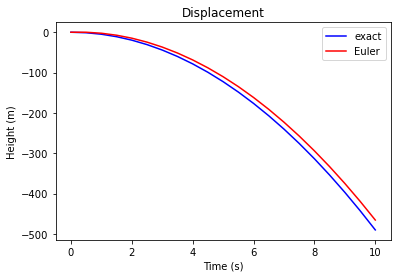

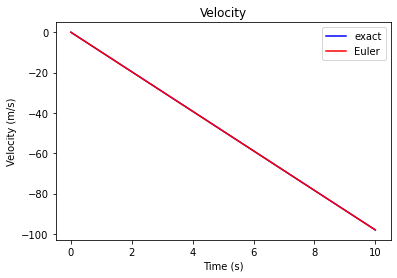

In [13]:
#Now we can plot both the position and velocity, comparing the exact solution to the numeric solution
figy, axy = plt.subplots()    #Create a new figure object and its associated axes
axy.plot(time, y_Exact,'b-', label='exact')                #Plot exact position versus t
axy.plot(time, y_Euler, 'r-', label='Euler')      #Add Euler solution to the plot
axy.set_xlabel('Time (s)')                        #Label the horizontal axis
axy.set_ylabel('Height (m)')                      #Label the vertical axis
axy.set_title("Displacement")                     #Title the plot
axy.legend()                                      #Put a legend on the plot

#Repeat for the velocity plot
figv, axv = plt.subplots()
axv.plot(time, v_Exact, 'b-', label='exact')
axv.plot(time, vy_Euler, 'r-', label='Euler')
axv.set_xlabel('Time (s)')
axv.set_ylabel('Velocity (m/s)')
axv.set_title('Velocity')
axv.legend()
plt.show()

 ### (Required) Exercise 2: 
 **Explaining Error**

Hmmm. Seems like for the default value of step size I have used, the exact and Euler solution don't agree that well in the position versus time graph. Why do you think that is? Change the step size and find one for which the exact and Euler solutions agree reasonably well through the entire simulation. Produce plots of $v(t)$ and $y(t)$ where each has as least three different curves calculated using the Euler method with different values of $\Delta t$. At least one should be in "good agreement" with the analytic solution. What did you define as "good agreement"?

**Note:** Check out *Algorithm Extension 1* below for suggestions of how to do this error analysis more systematically. 

**Challenge:** Why does the Euler solution on the velocity versus time graph agree with the exact solution, regardless of time step?

**Coding Challenge/Extension:** Can some parts of the `for` loop in `EulerFreeFall1D` be readily implemented with NumPy vector/array operations? Why or why not? If so, implement them this way.

### (Required) Exercise 3: 
**Exact and Approximate Trajectories in 2D**

Make plots of the trajectory of a projectile in free fall launched in 2-dimensions. So you must now, for each value of time, keep track of both the x-position and y-position, as well as the two components of the velocity vector $v_x$ and $v_y$. 

I'd recommend following my procedure above, defining new functions as necessary, generating data, and plotting in seprate code cells. 

Plot and compare both the exact solution for 2D projectile trajectories with the ones you find employing Euler's method. You can find the exact expressions for projectile trajectories [here (see equation 4.25)](https://openstax.org/books/university-physics-volume-1/pages/4-3-projectile-motion). Think about how to find $v_{x0}$ and $v_{y0}$ given then launch speed $v_0$ and angle $\theta$. I'd recommend testing your code with an initial velocity of around $v_0 = 10~\textrm{m/s}$, and for a few angles between $\theta = 0^{\circ}-90^{\circ}$.   Make sure your solutions include enough time points for the projectile to at least return to its initial height in your plots.

## Adding in air resistance

Ok, so far we have just produced a solution for a problem that we could handle analytically. In this case the Euler computational method didn't tell us anything new, and didn't work if we weren't careful with our step size. I guess computers aren't so useful after all ...

Hold on there, because the value of numerical approaches really become apparent when there is no exact solution. One example might be if an object (say a rocket) was subject to a time varying force $F(t)$ that had been measured but could not be described with a simple analytical (and integrable) function. In that case a computational approach to solving the problem of finding $v(t)$ and $y(t)$ would be the only possible solution, even if it was an approximate one.

It turns out that solving projectile trajectories in the presence of air resistance is a task that can only be solved computationally. We will model air resistance as a force proportional to the square of an object's velocity, with a direction opposite to the direction of that velocity. This force is typically called the drag force
$$\vec{F}_D = -b v^2 \hat{v}$$
where $v$ is the speed of the object, and $\hat{v}$ is a unit vector pointing in the direction of the object's velocity. The constant $b$ determines how strong the drag force is, and it can be calculated from other measurable physical quantities
$$b = \frac{C_D \rho A}{2}$$
where $A$ is the cross sectional area of an object, $\rho$ is the density of air, and $C_D$ is a dimensionless parameter called the drag coefficient which depends on the shape of the object.

We can add the air resistance into our 1D dropped model by modifying the diffenetial equations.
$$\frac{dv}{dt} = -g - \frac{b}{m}v^2 \textrm{sign}(v),~~~ \frac{dy}{dt} = v$$
Because the direction of the drag force depends on the direction of motion, but $v^2$ is always positive, we need to make sure we include $\textrm{sign}(v) = v/|v|$ in the second term.

To learn a bit more about air resistance and drag forces
1. [OpenStax Textbook](https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed) is a useful introductory source on the topic.
2. [PHeT Projectile Motion Simulator](https://phet.colorado.edu/sims/html/projectile-motion/latest/projectile-motion_en.html) this is quite fun to play around with to gain some intuition about projectile motion. You can compare this computer simulation to your own simulation both with and without air resistance.
3. *Classical Mechanics* by Taylor is a more advanced treatment of this topic (see PDF in Canvas Assignment)

### (Required) Exercise 4: 
**Adding air resistance to the 1D free fall model**

Add the drag force to your numerical simualtion using the Euler Method. Plot the position versus time and velocity versus time graphs. Include the trajectories in vaccum (no air resitance) on the same plots. You should observe the object reaches a terminal velocity. You'll need to consider a real object, so here are some ideas of air resitantce that can be calculated for spherical objects (i.e. balls). My recommendation is you define a function that computes the drag strength $b$ from these parameters. 

For a sphere $C_D = 0.5$. 
At atmostpheric pressure $\rho = 1.2~\textrm{kg/m}^3$ at sea level ($20^\circ$ and 1 atm of pressure).

For a baseball $m = 0.145$ kg, and $d = 74$ mm (according to [Wikipedia](https://en.wikipedia.org/wiki/Baseball_(ball)))

For an NBA basketball $m = 0.620$ kg, and $d = 75/(2\pi)$ cm (according to [Wikipedia](https://en.wikipedia.org/wiki/Basketball_(ball)))

## Exact solution to 1D motion with exact drag

For an object of mass $m$ experiencing quadratic drag $\vec{F}_D = -b v^2 \hat{v}$ falling straight downwards, the speed will terminate at a value equal to 
$$v_{ter} = \sqrt{\frac{m g}{b}}$$

You probably noticed this in your solution above. Well, it turns out that the equation of motion taking into account quadractic drag (air resistance) does have an exact solution. If you inegrate the equations of motion, you can solve for the speed and velocity as functions of time
$$v = v_{ter} \tanh\left(\frac{g t}{v_{ter}}\right)$$
$$y = \frac{(v_{ter})^2}{g} \ln\left[\cosh\left(\frac{gt}{v_{ter}}\right)\right]$$ 

So, we are stil solving an exact problem? What gives. Well lets at least examine the exact solution and compare it to our Euler algorithm solution.

**Source:** *Classical Mechanics* by Taylor, Section 2.4

### (Required) Exercise 5: 
**Compare exact and approximate numerical solutions for 1D free fall with air resistance**

Now produce a plot where you compare the exact functions given above to the approximate numerical solution. Indicate the value of $v_{\textrm{ter}}$ on your plot of velocity using a [horizontal line](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html) placed at the appropriate value. Play around a bit with your step size $\Delta t$ to find the largest value where the simulation and exact solution agree. How does this value of $\Delta t$ compared to that when you compared the exact and Euler solution without air resistance in Exercise 2?

## Drag in 2D

Ok, no more joking around, lets compute something that has no closed for analytical solution. If we launch a projectile in 2-dimensions (i.e. we launch it at an angle) in the presence of quadratic drag, there is no closed form analtic solution for the trajectory. 

In principle, we have already developed all the theory we might need to describe this trajectory. The velocity and position will now follow the vector differential equations,
$$\frac{d\vec{v}}{dt} = -g\hat{j} - \frac{b}{m}v^2 \hat{v},~~~ \frac{d\vec{r}}{dt} = \vec{v}$$

We can use Euler's method to calculate the velocity and position for both components. So now we are really solving differential equations for $v_x$, $v_y$, $x$, and $y$. 

### (Required) Exercise 6: 
**Euler Simulations of Drag in 2D**

**A)** Write down the four differential equations that you need to solve numerically to ultimately plot a projectile trajectory $y$ vs $x$. You can still do that with pencil and paper, but if you want to learn how to typeset math, you can copy and past some of the math typed into the markdown cells here to typeset your equations into LaTex (a widely used math typesetting language supported in Markdown). Here is a [quick guide to LaTex commands](http://tug.ctan.org/info/undergradmath/undergradmath.pdf). All the code you see in between `$ $` in the Markdown cells is Latex.

**B)** Now add drag to your simulation of 2D trajectories. The components of the velocity unit vector you can calculate by noting that a unit vector is, by definition 
$$\hat{v} = \frac{\vec{v}}{|v|} = \frac{v_x}{|v|}\hat{i} + \frac{v_y}{|v|}\hat{j}$$

You might find it useful to define a few helper function for vectors, like one to returns the magnitude of a vector given its components as inputs (`magnitude(vx, vy)`). Or one that returns the unit vector components for a particular vector (`v_hat(vx, vy)`).

**C)** Produce a plot of the modified trajectory of a projectile launched at $45^{\circ}$ on the same plot as the tractory in vacuum (no air resistance). Pick a launch speed for a particular projecile that shows a clear difference between the two trajectories. Make sure your simulation runs for enough time that you can see the object return to the ground.

**D)** Double check the simulation for a few different values of $\Delta t$ and notice the plot changes if $\Delta t$ gets too large. Produce a plot with at least four different trajectories calculated with the same initial conditions, but different values of $\Delta t$. What value of $\Delta t$ is "just small enough" to not notice any difference between plots, and how does this value compare to what you found in Exercises 2 and 5? 

**E)** Comment on what drag has done to the shape of the trajectory.

**F)** Plot the magnitude of the velocity over enough time to observe the object approach a terminal velocity.

## Physics Extension Exercises
Choose some of these extensions if you are interested in using the simulations you developed above to gather data and explore the properties of projectile motion with air resistance in more detail. 

Mostly inspired by problems from *Classical Mechanics* by Taylor

### Physics Extension 1: 
**Exploring Peak Height and Time with Drag**

Consider a projectile that is subject to quadratic air resistance, which is thrown vertically up with initial speed $v_0$. Use your simulation to find the peak of the projectile's trajectory. *Hint:* You may want to use the `np.max` or `np.argmax` functions. Take data for several different values of initial velocity (you may want to use a loop to iterate this process), and show that the peak height is consistent with
$$y_{\textrm{max}} = \frac{v_{\textrm{ter}}^2}{2 g} \ln\left(\frac{v_{\textrm{ter}}^2 + v_0^2}{v_{\textrm{ter}}^2}\right)$$
and that the time it take to reach the top is consistent with
$$t_{\textrm{top}} = \frac{v_{\textrm{ter}}}{g}\arctan \left(\frac{v_o}{v_{\textrm{ter}}}\right)$$

You can choose whatever physical parameters you want for an object, but I'd suggest thinking about the object as a baseball (see parameters above). You probably want to explore a range of initial velocities at least between $v_0 = 1$ and $v_0 = 40$ m/s. 

A **good** solution for this extension will include a plot (one each) comparing the prediction for $y_{\textrm{max}}$ and $t_{\textrm{top}}$ as a function of $v_0$ to the results of your numerical simulations of the trajectory. It will also show, on the same plot, the result for $y_{\textrm{max}}$ and $t_{\textrm{top}}$ when there is no air resistance present (which you could find either analytically, or from your numerical simulations).

An **exceptional** solution might even show the dependence on both $v_0$ and $v_{\textrm{ter}}$ using a [Matplotlib 3D plot](https://matplotlib.org/3.1.0/gallery/index.html#mplot3d-examples-index) so both velocities can be represented on plot axes. 

### Physics Extension 2: 
**Exploring Return Velocity with Drag**

Consider a projectile that is subject to quadratic air resistance, which is thrown vertically up from the ground with initial speed $v_0$. Find the speed when the ball returns to the ground $v_f$, and show that it is consistent with the equation

$$v_f = \frac{v_{\textrm{ter}} v_0}{\sqrt{v_{\textrm{ter}}^2 + v_0^2}}$$

Your output should be similar to the previous problem, that procing a plot of $v_f$ versus $v_0$, after running the simulation over a range of $v_0$ values. You should also indidcate in your plot what the result would be in vacuum. My suggestion for a 3D plot in Physics Extension 1 would also be interesting to try here.

*Hint:* You simulation will probably never exactly return to $y=0$, so don't try to check that directly. You'll have to find the point when the simulation just passed $y=0$. 

### Physics Extension 3: 
**Is $45^{\circ}$ still the maximum range?**

For a projecile launched in vacuum, the maximium range (i.e. horizontal distance when it returns to its starting height) is achieved with a launch angle of $45^\circ$. Is this still true when you introduce air resistance? 

For a fixed launch speed and drag strength, answer this question. A **good** answer should show a plot of the range as a function of a launch angle, and numerically find where the maximum value is. A **great** answer might check this for a few different values of $b$, to see whether their result depdends on the strenght of the drag. An **exceptional** solution might even show a plot of maximum range angle versus $b$, having collected data by looping over a range of values of $b$. 

For more info, [check out this paper](https://aapt.scitation.org/doi/10.1119/1.18804) (see PDF in Canvas). It seems to indicate you will find the strongest deviation when $b v_0 > mg$ for your simulation. So, I'd set your projectile's parameters according to those limits to see the largest range angle deviation possible. 

### Physics Extension 4
**Including atmospheric density variation**

To get an accurate trajectory for a projectile one must take into account several complications which can be accounted for in the numerical framework. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron connonball (diameter 15 cm, density 7.8 g/cm$^3$) that is fired with intial velocity 300 m/s at 50 degrees above the horizontal. Assume the atmospheric density falls off expoentially with height
$$\rho(y) = \rho_0 \exp(-y/\lambda)$$
where $\rho_0 = 1.2~\textrm{kg/m}^3$ is the atmospheric pressure at ground level, and $\lambda \approx 10,000~\textrm{m}$ is the empirical  decay coefficient of the pressure with increasing height.

**A)** Modify your simulation to account for this changing atmospheric pressure, and and solve numerically for $x(t)$ and $y(t)$ for $0 \leq t \leq 35$ s. Plot the ball's trajectory and find its horizontal range.

**B)** Do the same calculation ignoring the variation in atmospheric density (keep the density fixed at $\rho_0$), and yet again ignoring air resistnace entirely. Plot all three trajectories for appropriate time intervals on the same graph. You will find that in this case air resistance makes a huge difference and that the variation of air resistance makes a small, but not negligible, difference.

## Algorithm Extensions
Check out these extensions to get a better understanding of the performance of the Euler method for solving ODEs, and to experiment with some alternate ways of solving these same problems. 

### Algorithm Extension 1
**Systematic Study of Error in Euler Algorithm**

You noticed that the accuracy of the Euler solution depends on the time step $\Delta t$. It is important to quantify how much better the algorithm behaves as we decrease the time step. 

**A)** Pick 1D launch simulation of a fixed duration. Calculate the difference between the Euler model simulation of a projectile's position and the exact solution for the same quantity at any particular time. We'll call this the error in our simulation, $y_{\textrm{err}}$. For simplicity, it is fine to consider the case when there is no air resistance. Store that difference value and the value of the time step into arrays. 

**B)** Change $\Delta t$ and measure the difference again. Repeat this in a loop. You should then be able to plot $y_{\textrm{err}}$ versus $\Delta t$. What shape does that appear to take? Does this make sense considering how we derived the Euler algorithm?

**C)** You can also see how the error accumulates as the Euler algorithm solves for the trajectory across time. That is, for a fixed value of $\Delta t$, calculate and plot the $y_{\textrm{err}}$ as a function of time step to see how the error accumulates in time. Comment on the approximate functional form that you find.

### Algorithm Extension 2
**Quantifying error with no exact solution**

For the case of 1D motion, we can comapre the approximate numerical solution to the exact analytic one to quantify the error. But what if there is no analytic solution, as is the case of 2D trajectories with quadratic drag?

In that case, one strategy to gain confidence in your algorithm is to look for ***convergence*** in your results. What you want to do is repeat your simulation many different times with the same initial conditions, but by changing the step size $\Delta t$. You can then compare a represntative quantity, say $y(t_f, \Delta t)$, by taking the difference in that quantity between simulations with different $\Delta t$. In fact, you probably want to "normalize" the quantity by compting
$$\Delta y_{err} = \left| \frac{y(t_f, \Delta t_2) - y(t_f, \Delta t_1)}{\Delta t_2 - \Delta t_1} \right|$$

You should see that $\Delta y_{err}$ tends to zero as $\bar{\Delta t} = (\Delta t_2 + \Delta t_1)/2$ gets small, giving you confidence that small step sizes allows you simulation to converge to a solution that is at least consistent.

Produce a plot of the difference in $\Delta y_{err}$ versus $\bar{\Delta t}$ to demonstrate convergence in your simulations of 2D trajectories with drag.

### Algorithm Extension 3
**An improved ODE solve: Heun's Method**

You have just implemented the simplest ordinary differtial equation solver. In paractice, there are better algorithms for solving ordinary differential equations that are just as efficient than the Euler algorithm, but are more accurate. One that is still fairly simple to understand conceptually is called [Huen's Method](https://en.wikipedia.org/wiki/Heun%27s_method), which is an extension of Euler's method into what is referred to as two-stage second-order Runge–Kutta methods. For more a more visual explanation of why this works better than the Euler method, [check out this page.](http://calculuslab.deltacollege.edu/ODE/7-C-2/7-C-2-h.html)

One of the problems with the Euler algorithm is that, at each step, you are advancing the position of the object by time step $\Delta t$ using only the rate of change of the function at the initial time $y(t+\Delta t) = y(t) + v(t) \Delta t$. The reason error accumulates is that the velocity (the slope or rate of change of the position) itself changes over the time interval $\Delta t$. So what if instead of using just the value of $v(t)$, we use the average of this and $v(t + \Delta t)$ as the "slope" we use to increment $y$. So assuming we have already calculated $v(t)$ and $v(t+\Delta t)$, we could calculate the value of $y$ at each step in the loop using.

$$y(t+\Delta t) = y(t) + \frac{1}{2} \left[v(t) + v(t+\Delta t)\right] \Delta t$$

**A)** Implement Heun's method to solve for 1-dimensional projectile motion in vacuum (no air resistance). You should have noticed that the Euler solution for $v(t)$ was exact regardless of $\Delta t$, so upgrading to Heun's method won't make a difference there (this is only true because the gravitational force is approximated as a constant near the surface of the Earth). But you should find that implementing Heun's method for $y(t)$ gives a more accurate trajectory compared to the exact solution than the Euler method for a fixed step size.

**B)** You should noticed that all the error in the position, $y(t)$ has now disappeared with the Heun's method solution. Can you explain why this is the case, given some of the information about this and other second order Runga-Kutta algorithm? *Hint:* Think about derivatives of the differential equation for $y(t)$. 

**C)** If you include air resistance again, you will see that Heun's method should do a better job than Euler's method at approximating $y(t)$, in comparison to the exact solution. One approach to implementing this is to still use the Euler method to solve for $v(t)$, but use Heun's method to solve for $y(t)$. Confirm that this hybrid approach is doing a better job approximating the exact solution than the pure Euler solution for a given step size.

### Algorithm Extension 4
**Using SciPy differential equation solvers**

This powerful algorithmic machinery for solving ordinary differntial equations, or initial value problems (IPVs), is built into the SciPy package already. Use the [`scipy.integrate.solv_ipv` [doc]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) function, solve a trajectory problem. You will see that this function contains an option to use several different differential equation solving algorithms. Look up a bit of information about one of those methods, and write a few sentences describing what you learned in a Markdown cell. 